<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/54_Ultra_pro_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_MNIST_%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Ultra pro

Макс 10 баллов

Сделайте классификацию цифр mnist, используя только Xtrain (без Ytrain). 

Предобучите автокодировщик. Возьмите предобученный encoder.

Нужно кластеризовать скрытое пространство, полученное из encoder (т. е. кластеризовать изображения, так как при подаче изображения на вход encoder’у получится скрытое пространство).
 


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import mnist,fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation,MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
from tensorflow.keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder # Импортируем библиотеку StandardScaler и LabelEncoder
from sklearn.preprocessing import StandardScaler # Импортируем библиотеку StandardScaler для получения стандартного распределения набора данных
from sklearn.cluster import KMeans # Импортируем библиотуке KMeans для кластеризации
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Автокодировщик

In [ ]:
latent_dim = 10

def baseAutoencoder():
    models = {} # задаем словарь моделей

    img_input = Input((28,28,1))

    x = Conv2D(32, (3,3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Conv2D(64, (3,3), padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = Flatten()(x) # расплющиваем данные

    l = Dense(latent_dim)(x) # последний слой энкодера

    z = Input((latent_dim,)) # вход декодеру

    x = Dense(7*7*64, activation='relu')(z)
    x = Reshape((7, 7, 64))(x)

    x = Conv2DTranspose(64,(2,2), strides=(2,2), padding='same',activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2DTranspose(32,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)

    #Финальный слой
    out = Conv2D(1,(3,3),activation='sigmoid', padding='same')(x)

    models['encoder'] = Model(img_input, l)         # 1-я модель словаря с моделями, энкодер до скрытого пространства
    models['decoder'] = Model(z,out)               # 2-я модель словаря с моделями , декодер
    models['autencoder'] = Model(img_input, models['decoder'](models['encoder'](img_input)))    # 3-я модель словаря с моделями, полный автоэнкодер
    
    return models

models = baseAutoencoder() # создаем модель
autencoder = models['autencoder'] # присваиваем модели от Input до out имя autencoder
autencoder.compile(optimizer=Adam(), loss='mean_squared_error') # Компилируем нашу модель

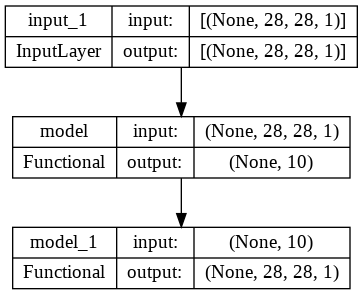

In [ ]:
utils.plot_model(autencoder, show_shapes=True)

In [ ]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data()
xTrainMnist = xTrainMnist.astype('float32')/255
xTrainMnist = xTrainMnist.reshape(xTrainMnist.shape[0],28,28,1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
autencoder.fit(xTrainMnist[:10000], xTrainMnist[:10000], epochs = 100, batch_size=100, validation_data = (xTrainMnist[10000:12000],xTrainMnist[10000:12000]))

Epoch 1/100
100/100 [==============================] - 11s 28ms/step - loss: 0.0740 - val_loss: 0.1096
Epoch 2/100
100/100 [==============================] - 2s 22ms/step - loss: 0.0280 - val_loss: 0.1137
Epoch 3/100
100/100 [==============================] - 2s 22ms/step - loss: 0.0205 - val_loss: 0.0803
Epoch 4/100
100/100 [==============================] - 2s 23ms/step - loss: 0.0173 - val_loss: 0.0356
Epoch 5/100
100/100 [==============================] - 2s 21ms/step - loss: 0.0158 - val_loss: 0.0224
Epoch 6/100
100/100 [==============================] - 2s 22ms/step - loss: 0.0147 - val_loss: 0.0153
Epoch 7/100
100/100 [==============================] - 2s 22ms/step - loss: 0.0139 - val_loss: 0.0144
Epoch 8/100
100/100 [==============================] - 2s 22ms/step - loss: 0.0134 - val_loss: 0.0146
Epoch 9/100
100/100 [==============================] - 3s 28ms/step - loss: 0.0129 - val_loss: 0.0142
Epoch 10/100
100/100 [==============================] - 2s 23ms/step - loss: 0.01

In [ ]:
autencoder.save_weights('/content/drive/MyDrive/Базы/Модели и веса к ДЗ/autencoder.h5')

In [ ]:
predMnist = autencoder.predict(xTrainMnist[:12000])
predMnist = predMnist*255
predMnist = predMnist.astype('uint8')

375/375 [==============================] - 2s 3ms/step


In [ ]:
def plotImages(startIndex, xTrain, pred):
    n = 10
    plt.figure(figsize=(10,4))
    for i in range(n):
      index = i + startIndex
      ax = plt.subplot(2,n,i+1)
      plt.imshow(xTrain[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2,n,i+1+n)
      plt.imshow(pred[index].reshape(28,28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.show()

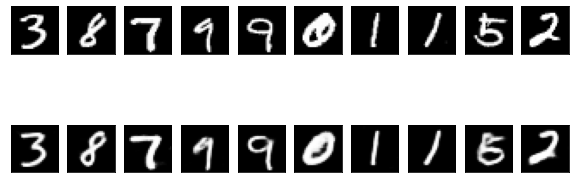

In [ ]:
plotImages(10000,xTrainMnist,predMnist)

In [ ]:
def getMSE(x1,x2):
    x1 = x1.flatten()
    x2 = x2.flatten()
    delta = x1 - x2
    return sum(delta**2)/len(delta)

In [ ]:
err = [getMSE(xTrainMnist[i],predMnist[i]/255) for i in range(len(predMnist))]
n = 1000
print(sum(err[0:n])/n)
print(sum(err[10000:10000+n])/n)

0.005285889956052567
0.0132052768509295


In [ ]:
models = baseAutoencoder() # создаем модель
encoder = models['encoder'] # присваиваем модели от Input до out имя autencoder
encoder.compile(optimizer=Adam(), loss='mean_squared_error') # Компилируем нашу модель

In [ ]:
latentDimSpace = encoder.predict(xTrainMnist)

1875/1875 [==============================] - 4s 2ms/step


In [ ]:
# # Применим веса обученной модели к нашему энкодеру
# encoder.layers[0] = autencoder.layers[0]
# encoder.layers[1] = autencoder.layers[1]
# encoder.layers[2] = autencoder.layers[2]
# encoder.layers[3] = autencoder.layers[3]
# encoder.layers[4] = autencoder.layers[4]
# encoder.layers[5] = autencoder.layers[5]
# encoder.layers[6] = autencoder.layers[6]
# encoder.layers[7] = autencoder.layers[7]
# encoder.layers[8] = autencoder.layers[8]
# encoder.layers[9] = autencoder.layers[9]


In [ ]:
print(latentDimSpace.shape, latentDimSpace, sep='\n')

(60000, 10)
[[-0.00288498 -0.00925001  0.03595943 ...  0.03222076  0.01594138
  -0.01293244]
 [ 0.00437464 -0.04383068  0.07991409 ...  0.01271828 -0.01938927
   0.00149599]
 [-0.00542409 -0.02350504  0.06167304 ...  0.01143705  0.01331402
  -0.01436941]
 ...
 [-0.00470767 -0.01382014  0.07048731 ...  0.0098617  -0.00219008
  -0.02763706]
 [-0.00333314 -0.03677838  0.05550602 ...  0.01274298 -0.00813759
  -0.00037378]
 [ 0.02735201 -0.04458892  0.04089028 ...  0.01801972 -0.00041111
   0.00115586]]


In [ ]:
#Кластеризация
cur_time = time.time()
clustersCount = 10                                   # Указываем количество кластеров
kmean = KMeans(clustersCount)                        # Создаем объект KMeans
kmean.fit(latentDimSpace)                            # Производим кластеризацию латентного пространства
labels = kmean.labels_                               # Сохраняем метки в переменную labels

nplatentDimSpace = np.array(latentDimSpace)                            # Преобразуем список элементов латентного пространства в numpy
print('Время обработки: ', round(time.time() - cur_time,2),'c')

Время обработки:  4.14 c


In [ ]:
print(labels)                                                   # Отображаем метки кластеров
clusterSize = [sum(labels==i) for i in range(0, clustersCount)] # Создадим список размеров каждого кластера

# Выведем номер кластера и его размер
for i, s in enumerate(clusterSize):
  print(i, s)


[2 5 7 ... 1 3 0]
0 5598
1 5593
2 6590
3 7411
4 6495
5 4898
6 4658
7 6120
8 5325
9 7312


In [ ]:
print(xTrainMnist[labels].shape)

(60000, 28, 28, 1)


In [ ]:
def plt_cluster_img(clusterNbr): # отобразим картинки в кластере, на вход подаем метку кластера
  labels == clusterNbr
  elements = xTrainMnist[labels]    
  n = 20
  plt.figure(figsize=(10,4))
  for i in range(n):
    clusterElement = np.random.randint(0, len(elements))

    ax = plt.subplot(2,n,i+1)
    plt.imshow(elements[clusterElement].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

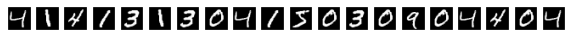

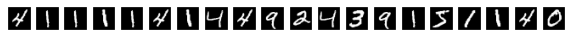

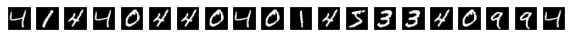

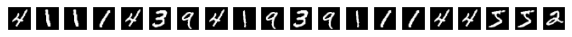

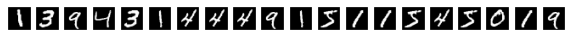

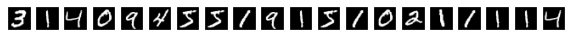

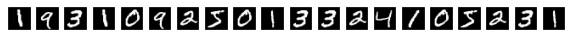

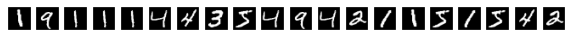

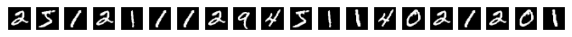

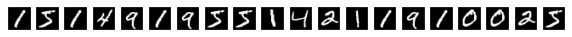

In [ ]:
# Выведем на экран по 20 рандомных элементов в каждом кластере
for i in range(10):
  plt_cluster_img(i)

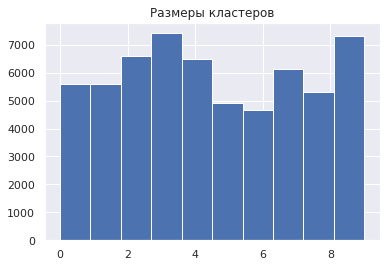

In [ ]:
# Общая гистограмма кластеров
plt.hist(labels) 
plt.title("Размеры кластеров") 
plt.show()